In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
dataset_df = pd.read_csv(r'/content/google_review_ratings.csv')

In [3]:
dataset_df.shape

(5456, 26)

Summary of the Dataset

In [4]:
dataset_df.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
dataset_df.head(5)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


# Data Cleaning and Preprocessing

In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

Only 24 categories are described in the dataset description and the last column is not included. So let's drop the column.

In [7]:
dataset_df.drop('Unnamed: 25', axis = 1, inplace = True)

Match the column headers based on the dataset categories

In [8]:
column_names = ['user_id', 'churches', 'resorts', 'beaches',
                'parks', 'theatres', 'museums', 'malls', 'zoo',
                'restaurants', 'pubs_bars', 'local_services',
                'burger_pizza_shops', 'hotels_other_lodgings',
                'juice_bars', 'art_galleries', 'dance_clubs',
                 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas',
                'cafes', 'view_points', 'monuments', 'gardens']

In [9]:
dataset_df.columns = column_names

In [10]:
dataset_df[column_names].isnull().sum()


user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

There are two columns with one null value  in each. To avoid discrepencies we are replacing the null values with 0 considering that the user never rated these categories.


In [11]:
dataset_df = dataset_df.fillna(0)

In [12]:
dataset_df.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [13]:
dataset_df['local_services'][dataset_df['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

In [14]:
local_services_mean = dataset_df['local_services'][dataset_df['local_services'] != '2\t2.']
dataset_df['local_services'][dataset_df['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
dataset_df['local_services'] = dataset_df['local_services'].astype('float64')

<ipython-input-14-b5e7df6e3cb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['local_services'][dataset_df['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


In [15]:
dataset_df.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

# Exploratory Data Analysis

In [16]:
dataset_df[column_names[:12]].describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
dataset_df[column_names[12:]].describe()

,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
dataset_df_description = dataset_df.describe()
min_val = dataset_df_description.loc['min'] > 0
min_val[min_val]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

The above 10 attributes have their minimum value greater than 0 and that denotes all users had given a rating to these categories. 

Text(0.5, 1.0, 'No of reviews for each category')

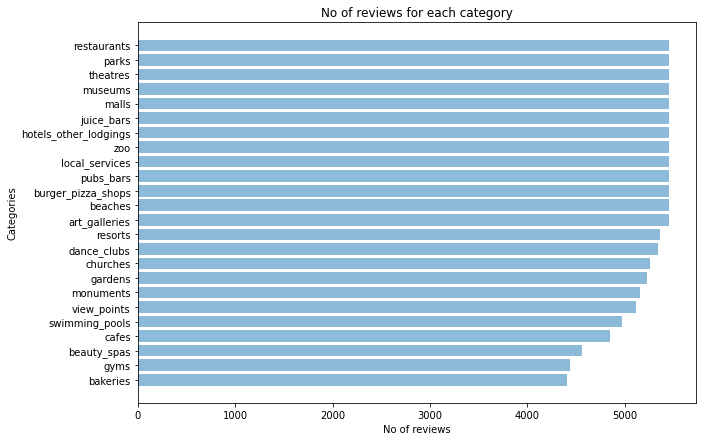

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
%matplotlib inline
no_of_zeros = dataset_df[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews for each category')


In [20]:
no_of_zeros

bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5230
churches                 5261
dance_clubs              5344
resorts                  5366
art_galleries            5452
beaches                  5452
burger_pizza_shops       5455
pubs_bars                5456
local_services           5456
zoo                      5456
hotels_other_lodgings    5456
juice_bars               5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
restaurants              5456
dtype: int64

Let us look at how many users have given rating for each category

No of users given rating to bakeries and gyms are the least

Let us have a look at the summary of ratings given by users for various categories

In [21]:
no_of_reviews = dataset_df[column_names[1:]].astype(bool).sum(axis=1).value_counts()

In [22]:
no_of_reviews.values

array([3724,  506,  457,  243,  167,  147,  115,   69,   22,    6])

Text(0.5, 1.0, 'No of Categories vs No of reviews')

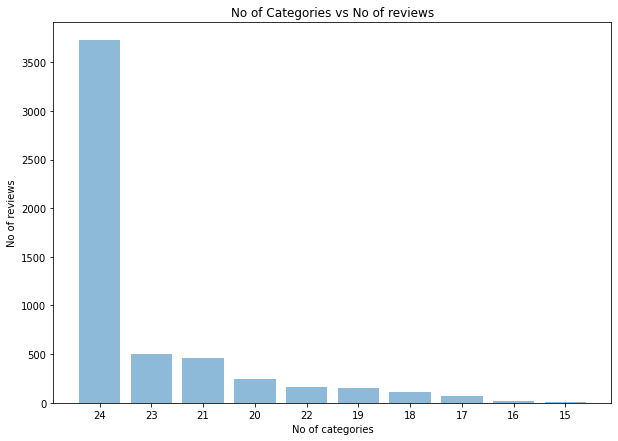

In [23]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')


We can easily understand that a total of 3725 users have given a review for all 24 categories and only 6 gave a review for 15 of all of them. Recommender systems can help the categories that have low ratings

In [24]:
avg_rating = dataset_df[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()

Text(0.5, 1.0, 'Average rating per Category')

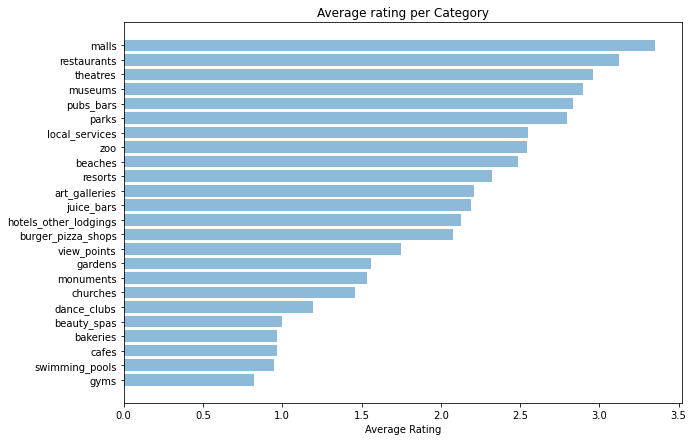

In [25]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

Malls have the highest average rating and gyms have the lowest average rating implying that travellers prefer malls than  gym. It is common that gyms are not usually visited by all the tourists.




Let us group all the different categories into higher levels and begin analysis

In [26]:
entertainment = ['theatres', 'dance_clubs', 'malls']
food = ['restaurants', 'pubs_bars', 'burger_pizza_shops', 'juice_bars', 'bakeries', 'cafes']
accomodation = ['hotels_other_lodgings', 'resorts']
art_activities = ['churches', 'museums', 'art_galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view_points', 'gardens']
amenities = ['local_services', 'swimming_pools', 'gyms', 'beauty_spas']

In [27]:
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food', 'accomodation', 'art_activities', 'nature', 'amenities'])

In [28]:
df_category_reviews

,entertainment,food,accomodation,art_activities,nature,amenities


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [29]:
df_category_reviews['entertainment'] = dataset_df[entertainment].mean(axis = 1)
df_category_reviews['food'] = dataset_df[food].mean(axis = 1)
df_category_reviews['accomodation'] = dataset_df[accomodation].mean(axis = 1)
df_category_reviews['art_activities'] = dataset_df[art_activities].mean(axis = 1)
df_category_reviews['nature'] = dataset_df[nature].mean(axis = 1)
df_category_reviews['amenities'] = dataset_df[amenities].mean(axis = 1)

In [30]:
df_category_reviews.describe()

,entertainment,food,accomodation,art_activities,nature,amenities
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


Entertainment has the highest average rating and amenities have the lowest rating implying that people are more interested in entertainment.

In [31]:
sns.set(style='darkgrid',palette = 'Set3',font_scale=1.25)

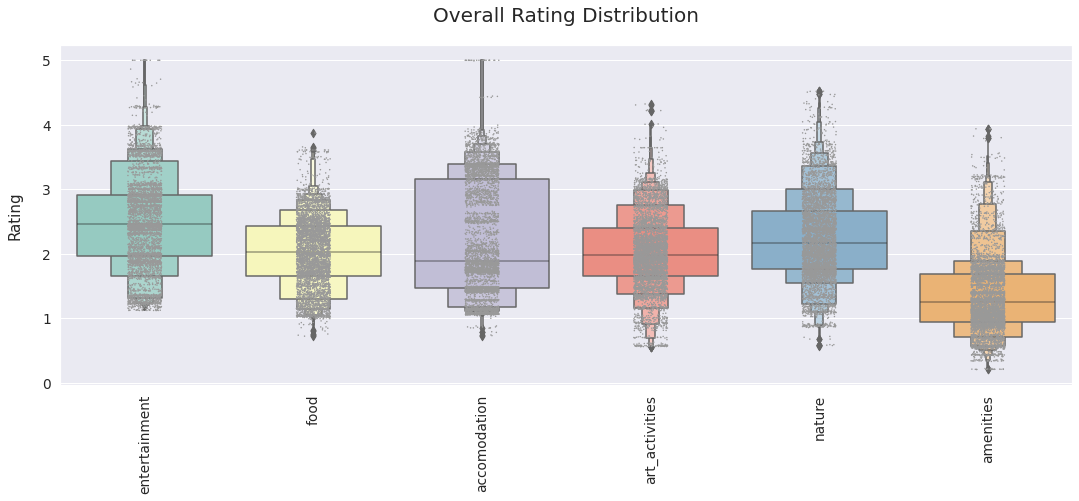

In [32]:

df_transform = pd.melt(df_category_reviews,value_vars = ['entertainment', 'food', 'accomodation', 'art_activities', 'nature', 'amenities'])

fig = plt.figure(figsize = (15,7))
g = sns.boxenplot(x='variable',y='value',data=df_transform,palette = 'Set3')
g = sns.stripplot(x='variable',y='value',data=df_transform,size=1.5, color=".6")
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)
plt.savefig('Overall Rating Distribution.png')

In [33]:
df_category_reviews

,entertainment,food,accomodation,art_activities,nature,amenities
0,3.530000,1.480000,0.850,1.1650,1.926,0.5500
1,3.530000,1.481667,0.850,1.1650,1.984,0.5500
2,3.530000,1.480000,0.850,1.1650,1.980,0.5500
3,3.530000,1.480000,1.100,1.1650,1.922,0.5575
4,3.530000,1.480000,0.850,1.1650,1.980,0.5500
...,...,...,...,...,...,...
5451,1.953333,1.150000,3.145,3.3700,2.888,1.8325
5452,1.733333,1.290000,3.135,2.3475,2.794,0.9800
5453,1.726667,1.135000,3.040,2.3450,2.798,1.8150
5454,1.730000,1.126667,2.555,3.3475,2.802,1.8100


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=42)
model.fit(df_category_reviews)
cluster = model.labels_

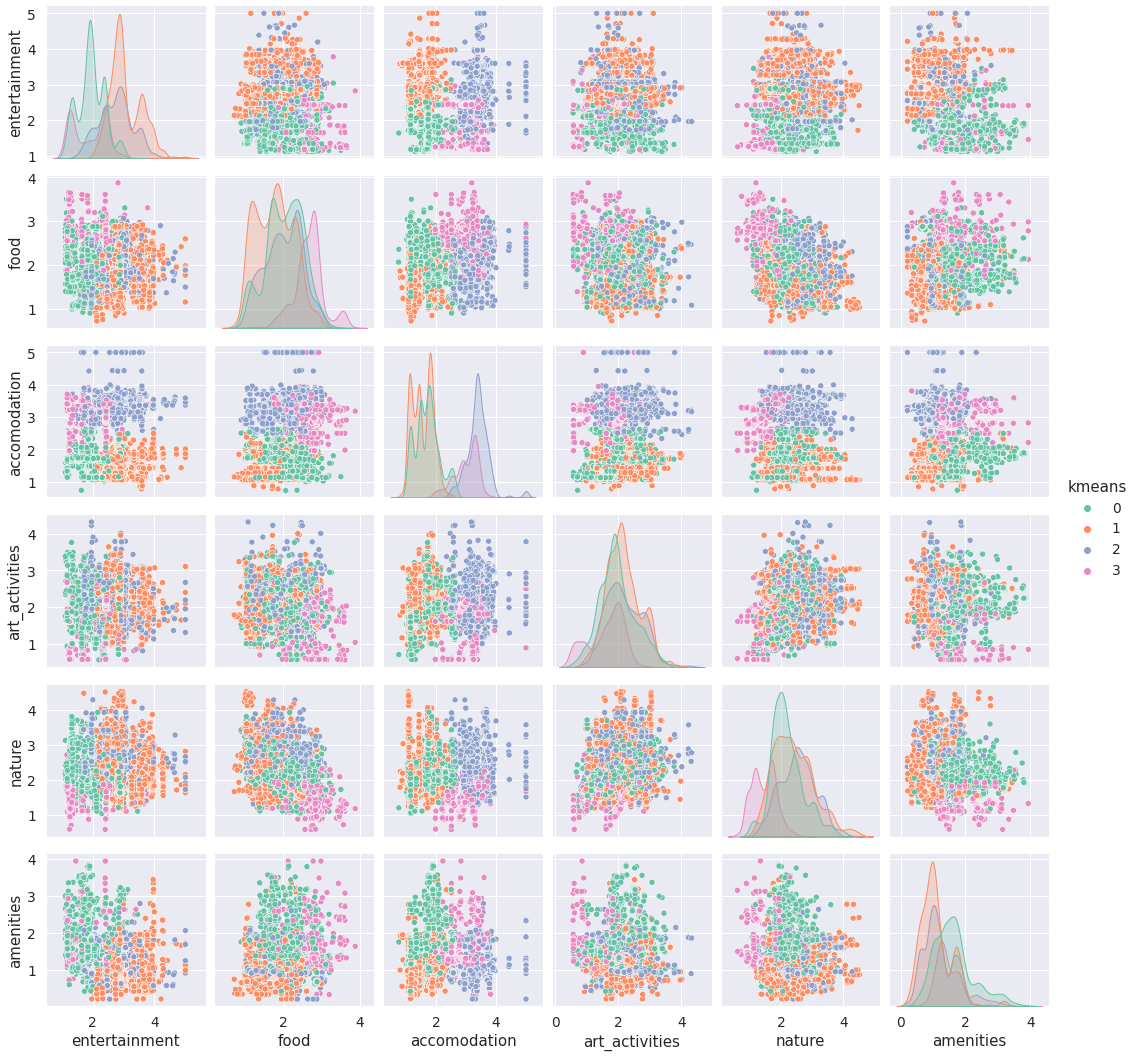

In [35]:
df_kmeans =df_category_reviews.copy()

df_kmeans['kmeans'] = model.fit_predict(df_category_reviews)

sns.pairplot( df_kmeans,palette='Set2', hue = 'kmeans')

In [36]:
dataset_df['cluster'] = cluster
df_long_up = pd.melt(dataset_df, "cluster", var_name="categories")

In [37]:
df_long_up

,cluster,categories,value
0,1,user_id,User 1
1,1,user_id,User 2
2,1,user_id,User 3
3,1,user_id,User 4
4,1,user_id,User 5
...,...,...,...
136395,2,gardens,1.56
136396,2,gardens,1.09
136397,2,gardens,1.11
136398,0,gardens,1.12
